In [1]:
import pandas as pd 
import numpy as np 

In [2]:
# Dropping additional index and med attend cols (med attend so the set matches a tutorial)
df = pd.read_csv('data/training.csv').drop(columns=['Unnamed: 0', 'MedicalAttendeesSurname'])
df

,Services,OPMeasurementProgram
0,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery
1,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy
2,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
3,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
4,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
...,...,...
20308,Theatre Booking : Robotic assisted total hip r...,Hip Arthroplasty (primary)
20309,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
20310,Theatre Booking : Multiple arthroscopic operat...,Foot & Ankle - Ankle Arthroscopy
20311,"Theatre Booking : Tibial osteotomy (W1660), Mu...",Knee - Osteotomy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20313 entries, 0 to 20312
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Services              20313 non-null  object
 1   OPMeasurementProgram  20313 non-null  object
dtypes: object(2)
memory usage: 317.5+ KB


In [5]:
from pycaret.nlp import *
su_1 = setup(data = df, target = 'OPMeasurementProgram')

Description,Value
session_id,6633
Documents,20313
Vocab Size,23
Custom Stopwords,False


In [6]:
m1 = create_model(model='lda', multi_core=True)

In [7]:
lda_data = assign_model(m1)

In [8]:
lda_data.head()

,Services,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Theatre Booking : Autograft anterior cruciate ...,surgery,0.625,0.125,0.125,0.125,Topic 0,0.62
1,Theatre Booking : Arthroscopic meniscal repair...,,0.250,0.250,0.250,0.250,Topic 0,0.25
2,Theatre Booking : Multiple arthroscopic operat...,,0.250,0.250,0.250,0.250,Topic 0,0.25
3,Theatre Booking : Revision of anterior cruciat...,surgery,0.625,0.125,0.125,0.125,Topic 0,0.62
4,Theatre Booking : Multiple arthroscopic operat...,,0.250,0.250,0.250,0.250,Topic 0,0.25


In [9]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [10]:
lda_data = lda_data.drop(columns=['Services', 'Dominant_Topic', 'Perc_Dominant_Topic'])
lda_data.head()

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3
0,surgery,0.625,0.125,0.125,0.125
1,,0.250,0.250,0.250,0.250
2,,0.250,0.250,0.250,0.250
3,surgery,0.625,0.125,0.125,0.125
4,,0.250,0.250,0.250,0.250


In [11]:
lda_data['OPMeasurementProgram'].value_counts()

                                             6969
surgery                                      4034
upper non arthroplasty shoulder elbow        3133
spinal degenerative pathway bsr procedure    2834
instability                                  1136
pain                                          487
arthroplasty primary                          416
foot ankle ankle arthroscopy                  348
foot ankle ankle mid hindfoot                 290
foot ankle forefoot                           267
shoulder elbow                                264
ankle achille rupture                          67
preservative                                   55
procedure                                      13
Name: OPMeasurementProgram, dtype: int64

In [12]:
# The processing altered the measurement programmes, adding them back in and using label encoder to turn into numerical features
lda_data['Flag'] = df['OPMeasurementProgram']
lda_data

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Flag
0,surgery,0.625000,0.125000,0.125000,0.125000,Knee - Ligament surgery
1,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
2,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
3,surgery,0.625000,0.125000,0.125000,0.125000,Knee - Ligament surgery
4,,0.250000,0.250000,0.250000,0.250000,Knee - Arthroscopy
...,...,...,...,...,...,...
20308,arthroplasty primary,0.083334,0.083334,0.749999,0.083333,Hip Arthroplasty (primary)
20309,surgery,0.625000,0.125000,0.125000,0.125000,Knee - Ligament surgery
20310,foot ankle ankle arthroscopy,0.050000,0.050000,0.050000,0.850000,Foot & Ankle - Ankle Arthroscopy
20311,,0.250000,0.250000,0.250000,0.250000,Knee - Osteotomy


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lda_data['Flag_transformed'] = le.fit_transform(lda_data['Flag'])

In [14]:
lda_data.head()

,OPMeasurementProgram,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Flag_transformed
0,surgery,0.625,0.125,0.125,0.125,Knee - Ligament surgery,8
1,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7
2,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7
3,surgery,0.625,0.125,0.125,0.125,Knee - Ligament surgery,8
4,,0.250,0.250,0.250,0.250,Knee - Arthroscopy,7


In [15]:
# Dropping old OP MP and new flag
lda_data = lda_data.drop(columns=['OPMeasurementProgram', 'Flag'])
lda_data.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Flag_transformed
0,0.625,0.125,0.125,0.125,8
1,0.250,0.250,0.250,0.250,7
2,0.250,0.250,0.250,0.250,7
3,0.625,0.125,0.125,0.125,8
4,0.250,0.250,0.250,0.250,7


In [16]:
from pycaret.classification import *

In [17]:
pce_1 = setup(data=lda_data, target='Flag_transformed', session_id=5, train_size=0.85)

,Description,Value
0,session_id,5
1,Target,Flag_transformed
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(20313, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.0180
rf,Random Forest Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.2900
gbc,Gradient Boosting Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,6.8600
lda,Linear Discriminant Analysis,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.0240
et,Extra Trees Classifier,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,0.2610
xgboost,Extreme Gradient Boosting,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,1.6590
lightgbm,Light Gradient Boosting Machine,0.8846,0.9664,0.8235,0.8079,0.8386,0.8617,0.8740,1.1270
knn,K Neighbors Classifier,0.8579,0.9572,0.8235,0.7828,0.8103,0.8327,0.8527,0.1520
nb,Naive Bayes,0.8417,0.9663,0.5882,0.7365,0.7785,0.8099,0.8224,0.0280
lr,Logistic Regression,0.7926,0.9647,0.3529,0.6582,0.7119,0.7496,0.7628,1.7540


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [19]:
pce_1_m1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [20]:
tuned_pce_1_ml = tune_model(pce_1_m1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [21]:
evaluate_model(tuned_pce_1_ml)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
pce_1_m2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [23]:
tuned_pce_1_m2 = tune_model(pce_1_m2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
1,0.8842,0.9662,0.8235,0.8073,0.8380,0.8611,0.8735
2,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
3,0.8848,0.9665,0.8235,0.8081,0.8387,0.8618,0.8742
4,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8742
5,0.8848,0.9665,0.8235,0.8081,0.8387,0.8619,0.8743
6,0.8853,0.9665,0.8235,0.8088,0.8394,0.8624,0.8747
7,0.8853,0.9666,0.8235,0.8089,0.8394,0.8625,0.8747
8,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735
9,0.8841,0.9662,0.8235,0.8072,0.8379,0.8610,0.8735


In [24]:
evaluate_model(tuned_pce_1_m2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## Model 2

In [2]:
# Dropping additional index and med attend cols (med attend so the set matches a tutorial)
df2 = pd.read_csv('data/training.csv').drop(columns=['Unnamed: 0'])
df2.head()

,MedicalAttendeesSurname,Services,OPMeasurementProgram
0,JonathanWebb,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery
1,AndyWilliams,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy
2,AndyWilliams,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy
3,SamChurch,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery
4,JonathanWebb,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy


In [3]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
le = LabelEncoder()
# Applying label encoder
df2['label'] = le.fit_transform(df2['OPMeasurementProgram'])
# Applying ordinal encodr
df2['surgeon'] = oe.fit_transform(df2[['MedicalAttendeesSurname']])
df2

,MedicalAttendeesSurname,Services,OPMeasurementProgram,label,surgeon
0,JonathanWebb,Theatre Booking : Autograft anterior cruciate ...,Knee - Ligament surgery,8,25.0
1,AndyWilliams,Theatre Booking : Arthroscopic meniscal repair...,Knee - Arthroscopy,7,8.0
2,AndyWilliams,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy,7,8.0
3,SamChurch,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery,8,32.0
4,JonathanWebb,Theatre Booking : Multiple arthroscopic operat...,Knee - Arthroscopy,7,25.0
...,...,...,...,...,...
20308,SimonBridle,Theatre Booking : Robotic assisted total hip r...,Hip Arthroplasty (primary),4,34.0
20309,AndrewDavies,Theatre Booking : Revision of anterior cruciat...,Knee - Ligament surgery,8,3.0
20310,PeterRosenfeld,Theatre Booking : Multiple arthroscopic operat...,Foot & Ankle - Ankle Arthroscopy,1,31.0
20311,DavidHoulihan-Burne,"Theatre Booking : Tibial osteotomy (W1660), Mu...",Knee - Osteotomy,9,13.0


In [4]:
# Dropping cols now coded
df2 = df2.drop(columns=['MedicalAttendeesSurname', 'OPMeasurementProgram'])
df2.head()

,Services,label,surgeon
0,Theatre Booking : Autograft anterior cruciate ...,8,25.0
1,Theatre Booking : Arthroscopic meniscal repair...,7,8.0
2,Theatre Booking : Multiple arthroscopic operat...,7,8.0
3,Theatre Booking : Revision of anterior cruciat...,8,32.0
4,Theatre Booking : Multiple arthroscopic operat...,7,25.0


In [5]:
from pycaret.nlp import *
exp_nlp102 = setup(data = df2, target = 'Services', session_id = 7)

Description,Value
session_id,7
Documents,20313
Vocab Size,448
Custom Stopwords,False


In [6]:
lda = create_model('lda')

In [30]:
print(lda)

LdaModel(num_terms=448, num_topics=4, decay=0.5, chunksize=100)


In [31]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)
#lda_results = assign_model(lda)
#lda_results.head()

In [32]:
print(lda2)

LdaModel(num_terms=448, num_topics=6, decay=0.5, chunksize=100)


In [33]:
lda_results = assign_model(lda)
lda_results.head()

,Services,label,surgeon,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,reconstruction sole procedure,8,25.0,0.011855,0.643085,0.327507,0.017553,Topic 1,0.64
1,book repair,7,8.0,0.017258,0.024751,0.932439,0.025552,Topic 2,0.93
2,book multiple arthroscopic operation knee incl...,7,8.0,0.636511,0.005907,0.351483,0.006099,Topic 0,0.64
3,book revision ligament reconstruction multiple...,8,32.0,0.247403,0.003826,0.744820,0.003950,Topic 2,0.74
4,book multiple arthroscopic operation knee incl...,7,25.0,0.777436,0.005328,0.211736,0.005500,Topic 0,0.78


In [34]:
plot_model()

In [35]:
plot_model(plot = 'bigram')

In [36]:
plot_model(plot = 'trigram')

In [37]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [38]:
plot_model(lda, plot = 'topic_distribution')

In [39]:
plot_model(lda, plot = 'tsne')

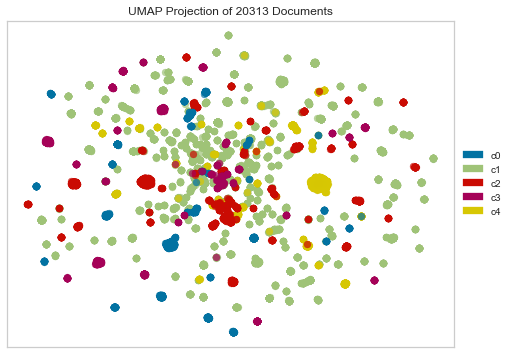

In [40]:
plot_model(lda, plot = 'umap')

In [41]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [42]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x163519f2b48>,
 'Final LDA Model 08Feb2020.pkl')

In [43]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 400 | Coherence: 0.6682


In [44]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'label')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 100 | R2 : 0.5703


In [7]:
nmf = create_model('nmf', num_topics=100)
nmf_results = assign_model(nmf)
nmf_results.head()

,Services,label,surgeon,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,...,Topic_92,Topic_93,Topic_94,Topic_95,Topic_96,Topic_97,Topic_98,Topic_99,Dominant_Topic,Perc_Dominant_Topic
0,reconstruction sole procedure,8,25.0,0.000011,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,Topic 8,0.71
1,book repair,7,8.0,0.000000,0.000000,0.107232,0.0,0.0,0.000000e+00,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,Topic 2,0.69
2,book multiple arthroscopic operation knee incl...,7,8.0,0.001018,0.013897,0.018525,0.0,0.0,0.000000e+00,0.000000,...,0.000049,0.0,0.0,0.000710,0.0,0.000000,0.0,0.0,Topic 62,0.30
3,book revision ligament reconstruction multiple...,8,32.0,0.000634,0.000000,0.000000,0.0,0.0,3.461511e-08,0.000881,...,0.000000,0.0,0.0,0.000000,0.0,0.067535,0.0,0.0,Topic 97,0.30
4,book multiple arthroscopic operation knee incl...,7,25.0,0.001458,0.009628,0.000000,0.0,0.0,0.000000e+00,0.052018,...,0.000000,0.0,0.0,0.001425,0.0,0.000000,0.0,0.0,Topic 40,0.30


In [9]:
save_model(nmf,'Final NMF Model 29Dec2021')

Model Succesfully Saved


(NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
     n_components=100, random_state=7, shuffle=False, solver='cd', tol=0.0001,
     verbose=0),
 'Final NMF Model 29Dec2021.pkl')

In [8]:
nmf_class = nmf_results.drop(columns=['Services', 'Dominant_Topic', 'Perc_Dominant_Topic'])
nmf_class

,label,surgeon,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,...,Topic_90,Topic_91,Topic_92,Topic_93,Topic_94,Topic_95,Topic_96,Topic_97,Topic_98,Topic_99
0,8,25.0,0.000011,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,7,8.0,0.000000,0.000000,0.107232,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,7,8.0,0.001018,0.013897,0.018525,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000185,0.000049,0.0,0.0,0.000710,0.000000,0.000000,0.0,0.000000
3,8,32.0,0.000634,0.000000,0.000000,0.0,0.000000,3.461511e-08,0.000881,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.067535,0.0,0.000000
4,7,25.0,0.001458,0.009628,0.000000,0.0,0.000000,0.000000e+00,0.052018,0.0,...,0.000000,0.000101,0.000000,0.0,0.0,0.001425,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20308,4,34.0,0.000000,0.000000,0.000000,0.0,0.026591,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.047902
20309,8,3.0,0.000378,0.000000,0.000000,0.0,0.000000,1.530357e-07,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.085407,0.0,0.000000
20310,1,31.0,0.003981,0.004065,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.013527,0.000000,0.000000,0.0,0.0,0.001031,0.001351,0.000000,0.0,0.000045
20311,9,13.0,0.000000,0.047602,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [29]:
saved_nmf = load_model('Final NMF Model 29Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [34]:
plot_model(saved_nmf, plot='tsne')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [14]:
#import classification module
from pycaret.classification import *
#intialize the setup
exp_clf = setup(nmf_class, target = 'label', data_split_stratify = True)

,Description,Value
0,session_id,3255
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(20313, 102)"
5,Missing Values,False
6,Numeric Features,101
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9453,0.8963,0.8188,0.9445,0.9441,0.9356,0.9356,34.1860
et,Extra Trees Classifier,0.9416,0.8904,0.8097,0.9406,0.9402,0.9312,0.9313,1.6100
rf,Random Forest Classifier,0.9412,0.8936,0.8092,0.9402,0.9398,0.9307,0.9308,1.1670
gbc,Gradient Boosting Classifier,0.9406,0.8916,0.8017,0.9401,0.9395,0.9300,0.9301,30.6970
dt,Decision Tree Classifier,0.9369,0.8772,0.8061,0.9360,0.9357,0.9257,0.9258,0.1880
knn,K Neighbors Classifier,0.9278,0.8845,0.7703,0.9275,0.9258,0.9148,0.9150,0.4200
ridge,Ridge Classifier,0.8965,0.0000,0.6526,0.8871,0.8859,0.8771,0.8782,0.1300
lda,Linear Discriminant Analysis,0.8913,0.8896,0.7679,0.9090,0.8965,0.8722,0.8729,0.3380
lr,Logistic Regression,0.8041,0.8807,0.3309,0.7342,0.7539,0.7631,0.7689,27.2050
lightgbm,Light Gradient Boosting Machine,0.8018,0.8035,0.6717,0.8417,0.7825,0.7589,0.7707,6.4520


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=3255, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [16]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9459,0.9974,0.8073,0.9454,0.9450,0.9362,0.9363
1,0.9409,0.9971,0.8016,0.9396,0.9398,0.9304,0.9305
2,0.9459,0.9960,0.7995,0.9440,0.9443,0.9362,0.9363
3,0.9402,0.9946,0.8286,0.9394,0.9389,0.9296,0.9297
4,0.9466,0.9964,0.8424,0.9484,0.9467,0.9371,0.9372
5,0.9494,0.9959,0.8123,0.9479,0.9480,0.9403,0.9404
6,0.9402,0.9955,0.7776,0.9394,0.9392,0.9296,0.9297
7,0.9381,0.9935,0.8118,0.9367,0.9364,0.9271,0.9272
8,0.9536,0.9963,0.8143,0.9526,0.9523,0.9453,0.9454
9,0.9521,0.0000,0.8928,0.9516,0.9509,0.9436,0.9437


In [17]:
save_model(xgb,'First XGB Model 29Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1,

In [18]:
tuned_xgboost = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9515,0.9977,0.8105,0.9505,0.9504,0.9428,0.9429
1,0.9416,0.9976,0.7812,0.9404,0.9398,0.9312,0.9313
2,0.9522,0.9963,0.8037,0.9507,0.9504,0.9436,0.9437
3,0.9430,0.9946,0.8134,0.9407,0.9411,0.9329,0.9329
4,0.9515,0.9976,0.8412,0.9515,0.9510,0.9429,0.9429
5,0.9473,0.9956,0.7925,0.9456,0.9455,0.9378,0.9379
6,0.9430,0.9971,0.7789,0.9424,0.9418,0.9329,0.9330
7,0.9395,0.9947,0.7973,0.9380,0.9371,0.9286,0.9288
8,0.9529,0.9966,0.7961,0.9520,0.9511,0.9444,0.9445
9,0.9500,0.0000,0.8652,0.9492,0.9479,0.9410,0.9412


In [19]:
save_model(tuned_xgboost,'Tuned XGB Model 29Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                interaction_constraints='', learning_rate=0.1,
                                max_delta_step=0, max_depth=5,
                                min_child_weight=3, missing=nan,
                                monotone_constraints='()', n_estima

In [20]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

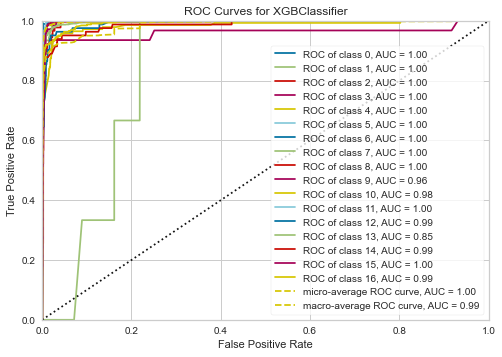

In [ ]:
plot_model(tuned_xgboost)

In [22]:
#blend all models
#blend_all = blend_models()
#create models for blending
#lr = create_model('lr')
rf = create_model('rf')
#knn = create_model('knn')
et = create_model('et')
#blend trained models
blend_specific = blend_models(estimator_list = [tuned_xgboost,rf,et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9473,0.9975,0.7983,0.9470,0.9466,0.9379,0.9379
1,0.9395,0.9973,0.7902,0.9383,0.9380,0.9287,0.9288
2,0.9508,0.9966,0.8048,0.9489,0.9490,0.9420,0.9421
3,0.9430,0.9944,0.8184,0.9409,0.9411,0.9329,0.9330
4,0.9473,0.9970,0.8358,0.9472,0.9466,0.9379,0.9380
5,0.9459,0.9961,0.8015,0.9446,0.9444,0.9362,0.9362
6,0.9374,0.9962,0.7617,0.9372,0.9363,0.9263,0.9264
7,0.9346,0.9946,0.8075,0.9333,0.9327,0.9229,0.9230
8,0.9550,0.9965,0.8172,0.9543,0.9537,0.9470,0.9470
9,0.9500,0.0000,0.8834,0.9493,0.9482,0.9410,0.9412


In [23]:
save_model(blend_specific,'Blended Specific Model 29Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
       

In [24]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 
# select best model 
best_blend = automl(optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9494,0.9973,0.8216,0.9488,0.9487,0.9403,0.9404
1,0.9367,0.9971,0.7903,0.9353,0.9354,0.9254,0.9255
2,0.9508,0.9959,0.8121,0.9493,0.9494,0.9420,0.9421
3,0.9423,0.9940,0.8212,0.9413,0.9407,0.9321,0.9322
4,0.9459,0.9960,0.8367,0.9462,0.9455,0.9363,0.9363
5,0.9494,0.9960,0.8328,0.9479,0.9480,0.9404,0.9404
6,0.9416,0.9946,0.7790,0.9412,0.9408,0.9313,0.9314
7,0.9339,0.9940,0.8061,0.9329,0.9322,0.9221,0.9222
8,0.9522,0.9967,0.8142,0.9513,0.9509,0.9436,0.9437
9,0.9514,0.0000,0.8981,0.9507,0.9502,0.9427,0.9429


In [25]:
save_model(best_blend,'Best Blend Model 29Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                interaction_constraints='', learning_rate=0.1,
                                max_delta_step=0, max_depth=5,
                                min_child_weight=3, missing=nan,
                                monotone_constraints='()', n_estima

In [26]:
evaluate_model(best_blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)